<a href="https://colab.research.google.com/github/AndreaMeza2800/SimulacionII/blob/main/Tarea3Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 3. Estimación del tiempo promedio de respuesta del sistema
Andrea Leticia Meza Villa

Graficar los datos de salida del código 

Retraso promedio =  1.4208


Text(0, 0.5, 'Tiempo de retraso ')

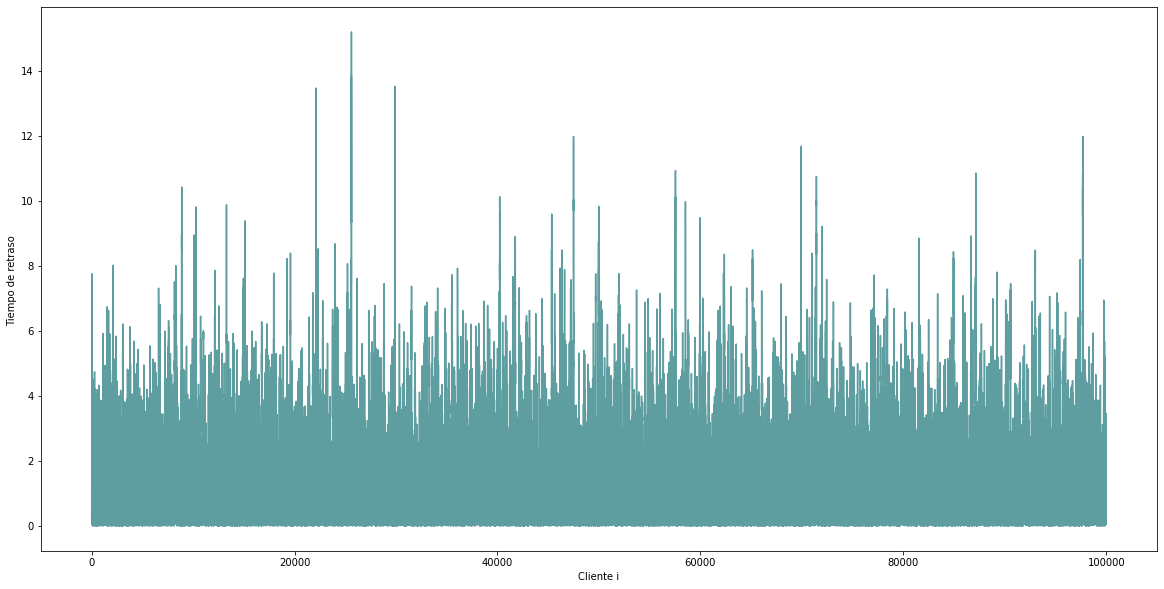

In [110]:
from random import expovariate
from math import inf as Infinity
from statistics import mean 
import matplotlib.pyplot as plt
# Parametros

lamda = 1.3                         # Razón de arrivos (1/Lambda)  Ojo
mu = 2.0                            # Razón de salida (1/Mu)       Ojo


Num_Pkts = 100000                  # Numero de paquetes a simular
#T = 100000
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema

tll = expovariate(lamda)            # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales
E=0
S=0
c=[]
while count < Num_Pkts:
#while t < T:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        N = N + 1.0
        E=E+1
        count = count + 1                         # Paquetes simulados
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
    else:                                         # Evento de salida
        t = ts 
        ts_Data.append(t)
        N = N - 1.0
        S=S+1
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity

while N>0: # t > T  #Termina el tiempo de simulación (Ya no recibe mas arrivo de clientes)
  t=ts
  ts_Data.append(t)
  N=N - 1.0 #Salen ultimos clientes
  S=S+1
  if N > 0:
    ts = t + expovariate(mu)
  else:
    ts = Infinity
#print(E)
#print(S)           
# Estimación del retraso promedio:

for i in range(Num_Pkts):
#for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)
    c.append(i+1)

print( "Retraso promedio = ", round( mean(r_Data), 4) )
plt.figure(figsize=(20,10))
plt.plot(c,r_Data, drawstyle='steps-post',color="cadetblue")
plt.xlabel('Cliente i')
plt.ylabel('Tiempo de retraso ')